In [1]:
import pickle
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

from helpers import *


### Analysing the number of comments per channel in the comments dataset

In [2]:
# Retrieve the comments_per_channel dictionnary
with open("/dlabdata1/youtube_large/jouven/comments_per_channel_id.pkl",'rb') as f:
     comments_per_channels = pickle.load(f)
f.close()

In [3]:
with open("/dlabdata1/youtube_large/jouven/comments_per_channel.pkl",'rb') as f:
     comments_per_channels2 = pickle.load(f)
f.close()

In [7]:
len(comments_per_channels2)

134385

In [40]:
# Number of comments sorted in decreasing order for plotting
sorted_comments = np.array(sorted(comments_per_channels.values(), reverse = True))

In [10]:
with open("/dlabdata1/youtube_large/jouven/comments_per_channel.pkl",'rb') as f:
     comments_per_channels2 = pickle.load(f)
f.close()

In [12]:
len(comments_per_channels)

134385

In [14]:
import pandas as pd
channels_id = pd.read_csv("/dlabdata1/youtube_large/df_channels_en.csv.gz")

In [15]:
len(channels_id)

136470

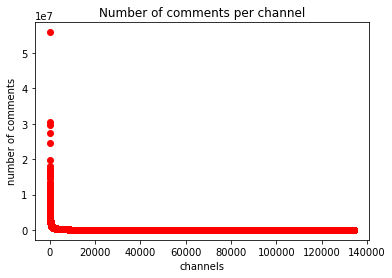

In [41]:
plt.plot(sorted_comments, 'ro')
plt.ylabel('number of comments')
plt.xlabel('channels')
plt.title('Number of comments per channel')
plt.show()

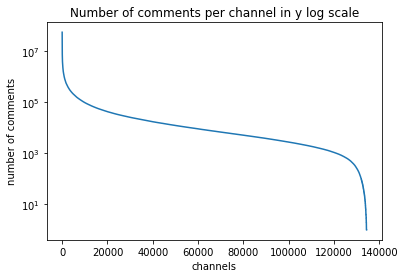

In [42]:
plt.plot(sorted_comments)
plt.yscale('log')
plt.ylabel('number of comments')
plt.xlabel('channels')
plt.title('Number of comments per channel in y log scale')
plt.show()

Number of comments of few interesting point

In [43]:
sorted_comments[120000]

1090

In [44]:
sorted_comments[55001]

10608

In [45]:
sorted_comments[0]

55844251

In [46]:
sorted_comments[len(sorted_comments)-1]

1

On the figure above we can see that some channels have a large number of comments whereas some channels only have a few comments. 
To derive optimal/meaningful vector representation out of the channels, we decided to take channels that have more 10k channels

In [66]:
# Select the channel id corresponding to the top 60'000 channels in terms of comments
selected_comments = sorted_comments[sorted_comments >= 10000]
selected_channel_id = [key for key in comments_per_channels if (comments_per_channels[key] >= 10000)]

In [67]:
len(selected_comments)

57004

In [68]:
len(selected_channel_id)

57004

In [71]:
total_comments = 0
subset_comments = 0

for comments in sorted_comments:
    total_comments += comments
for comments in selected_comments:
    subset_comments += comments

percentage_comments = 100 * subset_comments / total_comments

In [72]:
percentage_comments

95.6294792224481

In [73]:
# Store the set of filtered channels: having more than 10k channels
with open("/dlabdata1/youtube_large/jouven/channels_more_10k.pkl",'wb') as f:
    pickle.dump(selected_channel_id, f)
f.close()

### Analysing the number of users that commented each channel

In [4]:
# Retrieve the users_per_channel dictionnary
with open("/dlabdata1/youtube_large/jouven/users_per_channel_id.pkl",'rb') as f:
     users_per_channel = pickle.load(f)
f.close()

In [19]:
channels = set(comments_per_channels.keys())

In [20]:
users_per_channel_filtered = {}
for key, val in users_per_channel.items():
    if key in channels:
        users_per_channel_filtered[key] = val

In [21]:
# Number of users that commented on each channel sorted in decreasing order for plotting
sorted_users = sorted(users_per_channel_filtered.values(), reverse = True)

In [76]:
len(sorted_users)

134040

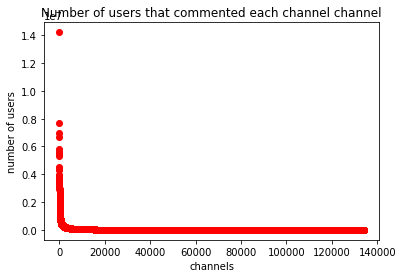

In [22]:
plt.plot(sorted_users, 'ro')
plt.ylabel('number of users')
plt.xlabel('channels')
plt.title('Number of users that commented each channel channel')
plt.show()

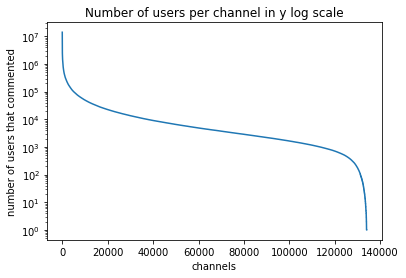

In [23]:
plt.plot(sorted_users)
plt.yscale('log')
plt.ylabel('number of users that commented')
plt.xlabel('channels')
plt.title('Number of users per channel in y log scale')
plt.show()

In [24]:
sorted_users[0]

14217675

In [25]:
sorted_users[1]

7693137